# 알츠하이머 예측하기 
## 데이터 출처
- 알츠하이머 데이터
- https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

# 데이터 확인
## 1. 인적 정보
|column 명|설명|value|column 명|설명|value|
|--|--|--|--|--|--|
|PatientID|식별 번호|471-6900|Age|나이|60-90|
|Gender|성별|0:남자, 1 : 여자|Ethnicity|인종|0:백인, 1 : 아프리카계 미국인, 2 : 아시아, 3 : 기타|
|EducationLevel|교육 수준|0 : 없음, 1 : 고등학교, 2 : 학사, 3 : 더 높음||||

## 2. lifestype
|column 명|설명|value|column 명|설명|value|
|--|--|--|--|--|--|
|Smoking|흡연 유/무|0 : 아니오, 1 : 예|AlcoholConsumption|주당 알코올 소비량|0-20|
|PhysicalActivity|주간 신체 활동량|0-10|DietQuality|식단 품질|0-10|
|SleepQuality|수면의 질|4-10||||

## 3. 병력
|column 명|설명|value|column 명|설명|value|
|--|--|--|--|--|--|
|FamilyHistoryAlzheimers|알츠하이머 가족력|0 : 없음, 1 : 예|CardiovascularDisease|심혈관 질환 유무|0 : 없음, 1 : 예|
|Diabetes|당뇨병 유무|0 : 없음, 1 : 예|Depression|우울증 유무|0 : 없음, 1 : 예|
|HeadInjury|두부 손상 유무|0 : 없음, 1 : 예|Hypertension|고혈압 유무|0 : 없음, 1 : 예|

## 4. 임상 측정
|column 명|설명|value|column 명|설명|value|
|--|--|--|--|--|--|
|SystolicBP|수축기 혈압|90-180|DiastolicBP|이완기 혈압|60-120|
|CholesterolTotal|콜레스테롤 총량|150-300|CholesterolLDL|LDL콜레스테롤 수치|50-200|
|CholesterolHDL|HDL콜레스테롤 수치|20-100|CholesterolTriglycerides|중성지방|50-400|
|BMI|신체질량지수|15-40||||

## 5. 인지 및 기능 평가
|column 명|설명|value|column 명|설명|value|
|--|--|--|--|--|--|
|MMSE|간이 정신 상태 검사 점수|0-30, 낮을수록 인지 장애가 있음|FunctionalAssessment|기능평가|0-10, 낮을수록 기능 장애가 심함|
|MemoryComplaints|기억 장애 유무|0 : 없음, 1 : 예|BehavioralProblems|행동 문제 유무|0 : 없음, 1 : 예|
|ADL|일상생활활동 점수|0-10, 낮을수록 장애가 심함||||

## 6. 증상
|column 명|설명|value|column 명|설명|value|
|--|--|--|--|--|--|
|Confusion|혼란의 유무|0 : 없음, 1 : 예|Disorientation|방향 감각 상실 유무|0 : 없음, 1 : 예|
|PersonalityChanges|성격 변화 유무|0 : 없음, 1 : 예|DifficultyCompletingTasks|작업 완료 어려움 유무|0 : 없음, 1 : 예|
|Forgetfulness|건망증 유무|0 : 없음, 1 : 예||||

## 7. 진단
|column 명|설명|value|column 명|설명|value|
|--|--|--|--|--|--|
|Diagnosis|알츠하이머 유무|0 : 없음, 1 : 예|DoctorInCharge|담당 의사에 대한 정보|'XXXConfid'|

In [1]:
pip install imblearn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats 
from statsmodels.formula.api import logit 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../alzheimers_disease_data.csv')
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


# 데이터 전처리

## 결측치 확인 : 없음

In [4]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

## 필요한 데이터만 추출

In [5]:
df = df[['MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems','ADL','Diagnosis']]

## 데이터 정규화

In [6]:
scaler = MinMaxScaler()
for i in ['MMSE','FunctionalAssessment','ADL']:
    df[i] = scaler.fit_transform(df[[i]])
df.describe()

/tmp/ipykernel_41/1032195634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = scaler.fit_transform(df[[i]])
/tmp/ipykernel_41/1032195634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = scaler.fit_transform(df[[i]])
/tmp/ipykernel_41/1032195634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,0.491889,0.508162,0.208004,0.156817,0.498244,0.353653
std,0.287238,0.289390,0.405974,0.363713,0.295023,0.478214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238854,0.256685,0.000000,0.000000,0.234191,0.000000
50%,0.481435,0.509601,0.000000,0.000000,0.503846,0.000000
75%,0.738867,0.754954,0.000000,0.000000,0.758137,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 데이터 샘플링 : SMOTE

In [7]:
cate_columns = ['MemoryComplaints','BehavioralProblems']
cate_indices = [df.columns.get_loc(col) for col in cate_columns]
cate_indices

[2, 3]

In [8]:
from imblearn.over_sampling import SMOTENC
import pandas as pd
cate_columns = ['MemoryComplaints','BehavioralProblems']
cate_indices = [df.columns.get_loc(col) for col in cate_columns]
cate_indices
# SMOTENC 적용
overSampling = SMOTENC(categorical_features=cate_indices, sampling_strategy=0.9, random_state=42)
feature = df.drop('Diagnosis', axis=1)
target = df['Diagnosis']
feature_sample, target_sample = overSampling.fit_resample(feature, target)

print(feature.shape, target.shape, feature_sample.shape, target_sample.shape)
df = pd.concat([feature_sample, target_sample], axis=1)
df


(2149, 5) (2149,) (2639, 5) (2639,)


,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,0.715606,0.652102,0,0,0.172486,0
1,0.687251,0.712108,0,0,0.259154,0
2,0.245145,0.589697,0,0,0.711936,0
3,0.466410,0.896823,0,1,0.648094,0
4,0.450619,0.604699,0,0,0.001341,0
...,...,...,...,...,...,...
2634,0.476287,0.742540,0,0,0.794612,1
2635,0.701244,0.352546,0,0,0.375549,1
2636,0.042906,0.173107,0,0,0.053816,1
2637,0.212254,0.048536,0,0,0.073535,1


### train,test 데이터셋 분리

In [9]:
feature = df.drop('Diagnosis',axis=1)
target = df['Diagnosis']
train_feature, test_feature,train_target,test_target = train_test_split(feature,target,test_size= 0.3,random_state = 23)

# 분류 모델 만들기

## 분류 모델 선택하기
- 성능이 상대적으로 좋은 Random Forest Classifier와 K-Nearest Neighbors를 앙상블하여 만든 모델과 Random Forest Classifier와 부스팅 기법을 사용하여 만든 모델을 비교하여 더 높은 모델 선택

#### logisticRegression ( accuracy : 0.83, roc_auc_score : 0.91 )

In [10]:
logistic_train_feature = train_feature
logistic_train_target = train_target
logistic_test_feature = test_feature
logistic_test_target = test_target

In [11]:
from sklearn import linear_model
logisticRegression=linear_model.LogisticRegression()
logisticRegression.fit(logistic_train_feature,logistic_train_target)

LogisticRegression()

In [12]:
logistic_test_feature_predict = logisticRegression.predict(logistic_test_feature)
logistic_test_feature_predict_proba = logisticRegression.predict_proba(logistic_test_feature)[:,1]

In [13]:
from sklearn.metrics import classification_report
print(classification_report(logistic_test_target, logistic_test_feature_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       413
           1       0.82      0.82      0.82       379

    accuracy                           0.83       792
   macro avg       0.83      0.83      0.83       792
weighted avg       0.83      0.83      0.83       792



In [278]:
print(f1_score(logistic_test_target, logistic_test_feature_predict))
print(accuracy_score(logistic_test_target, logistic_test_feature_predict))

0.8190224570673712
0.827020202020202


In [14]:
roc_auc_score(logistic_test_target,logistic_test_feature_predict_proba)

0.9059395503651126

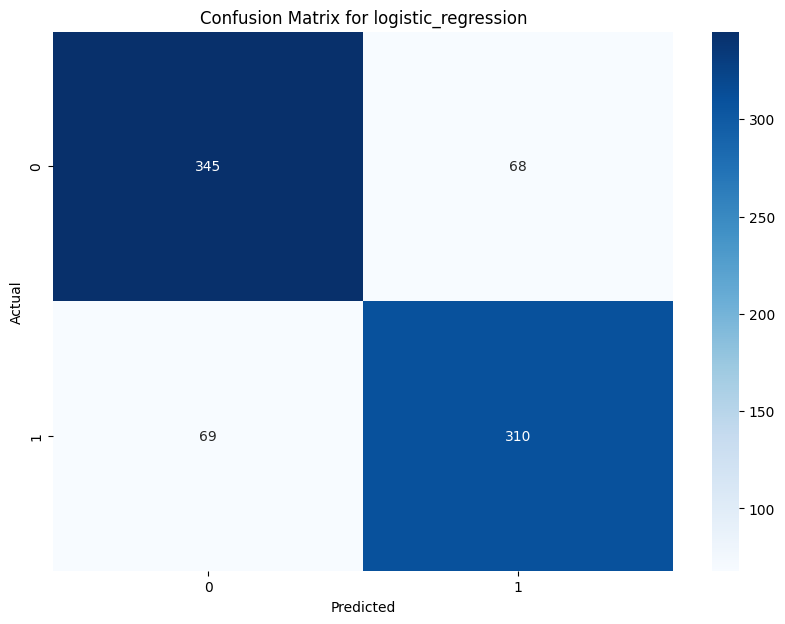

In [15]:
cm = confusion_matrix(logistic_test_target, logistic_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for logistic_regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Decision Tree Classifer ( accuracy : 0.92, roc_auc_score : 0.91 )

In [16]:
DTC_train_feature = train_feature
DTC_train_target = train_target
DTC_test_feature = test_feature
DTC_test_target = test_target


In [17]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier=DecisionTreeClassifier()
decisionTreeClassifier.fit(DTC_train_feature,DTC_train_target)

DecisionTreeClassifier()

In [18]:
DTC_test_feature_predict = decisionTreeClassifier.predict(DTC_test_feature)
DTC_test_feature_predict_proba = decisionTreeClassifier.predict_proba(DTC_test_feature)[:,1]

In [19]:
from sklearn.metrics import classification_report
print(classification_report(DTC_test_target, DTC_test_feature_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       413
           1       0.92      0.92      0.92       379

    accuracy                           0.92       792
   macro avg       0.92      0.92      0.92       792
weighted avg       0.92      0.92      0.92       792



In [279]:
print(f1_score(DTC_test_target, DTC_test_feature_predict))
print(accuracy_score(DTC_test_target, DTC_test_feature_predict))

0.916776750330251
0.9204545454545454


In [20]:
roc_auc_score(DTC_test_target, DTC_test_feature_predict_proba)

0.9202533748171242

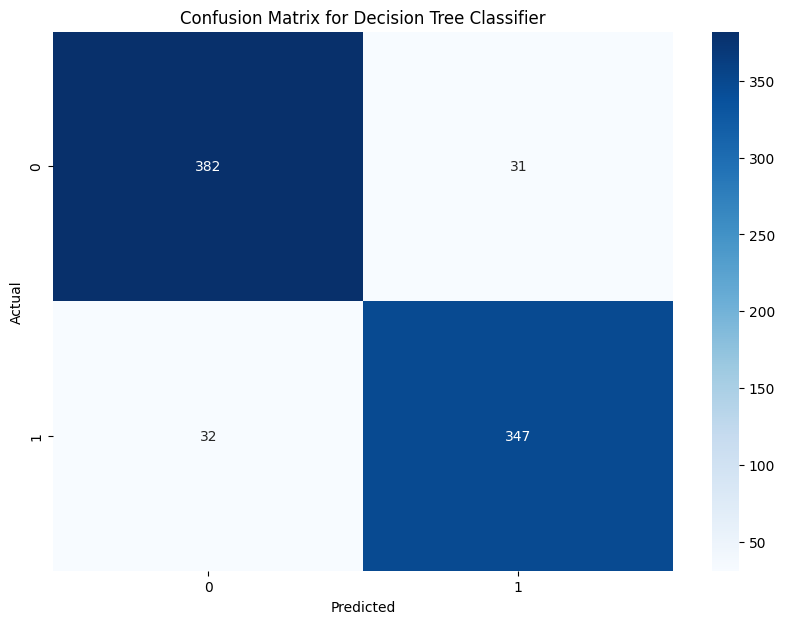

In [21]:
cm = confusion_matrix(DTC_test_target, DTC_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Naive Bayes ( accuracy : 0.84, roc_auc_score : 0.90 )

In [22]:
nb_train_feature = train_feature
nb_train_target = train_target
nb_test_feature = test_feature
nb_test_target = test_target

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(nb_train_feature,nb_train_target)

GaussianNB()

In [24]:
nb_test_feature_predict = nb.predict(nb_test_feature)
nb_test_feature_predict_proba = nb.predict_proba(nb_test_feature)[:,1]

In [25]:
from sklearn.metrics import classification_report
print(classification_report(nb_test_target, nb_test_feature_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       413
           1       0.83      0.83      0.83       379

    accuracy                           0.84       792
   macro avg       0.84      0.84      0.84       792
weighted avg       0.84      0.84      0.84       792



In [280]:
print(f1_score(knn_test_target, knn_test_feature_predict))
print(accuracy_score(knn_test_target, knn_test_feature_predict))

0.9194805194805195
0.9217171717171717


In [26]:
roc_auc_score(nb_test_target, nb_test_feature_predict_proba)

0.9029432621847988

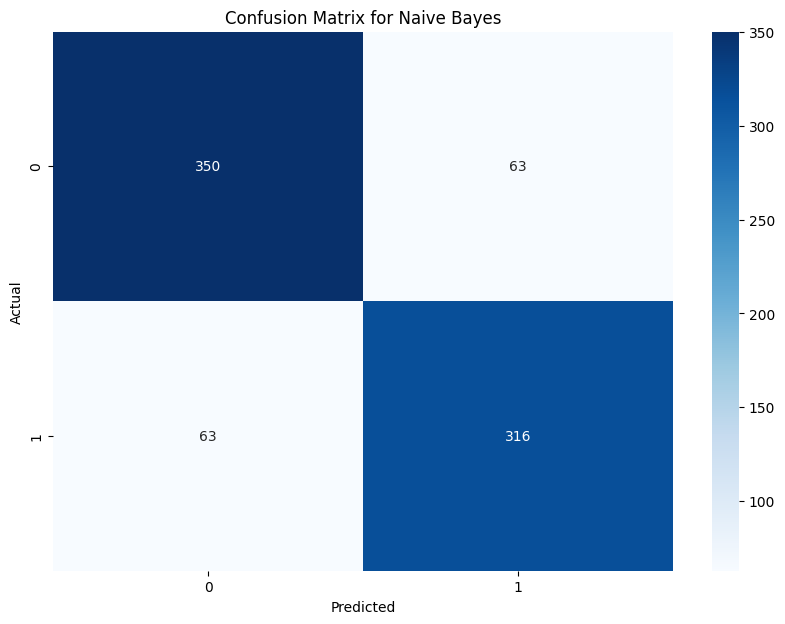

In [27]:
cm = confusion_matrix(nb_test_target, nb_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### K-Nearest Neighbors ( accuracy : 0.92, roc_auc_score : 0.96 )

In [212]:
knn_train_feature = train_feature
knn_train_target = train_target
knn_test_feature = test_feature
knn_test_target = test_target


In [213]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(knn_train_feature,knn_train_target)

KNeighborsClassifier()

In [214]:
knn_test_feature_predict = knn.predict(knn_test_feature)
knn_test_feature_predict_proba = knn.predict_proba(knn_test_feature)[:,1]

In [215]:
from sklearn.metrics import classification_report
print(classification_report(knn_test_target, knn_test_feature_predict))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       413
           1       0.91      0.93      0.92       379

    accuracy                           0.92       792
   macro avg       0.92      0.92      0.92       792
weighted avg       0.92      0.92      0.92       792



In [281]:
print(f1_score(knn_test_target, knn_test_feature_predict))
print(accuracy_score(knn_test_target, knn_test_feature_predict))

0.9194805194805195
0.9217171717171717


In [216]:
roc_auc_score(knn_test_target, knn_test_feature_predict_proba)

0.9643639755441553

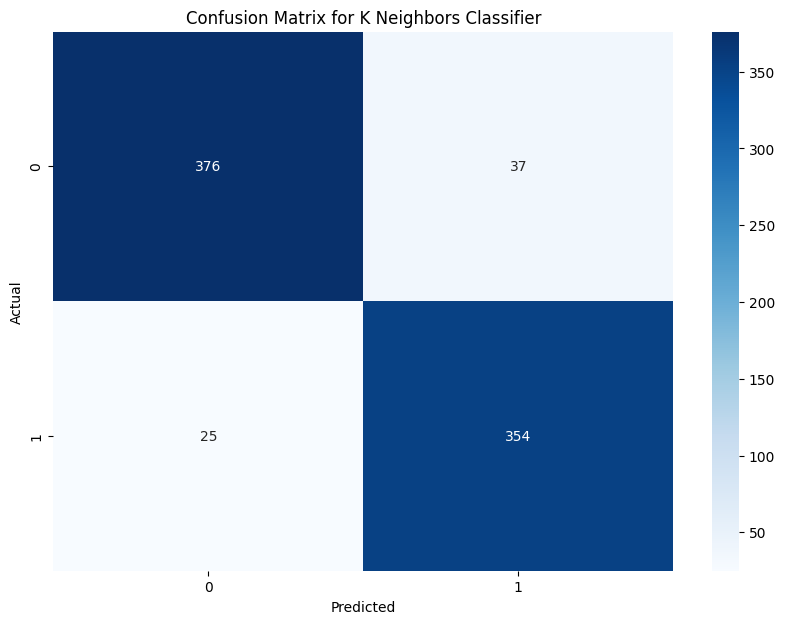

In [217]:
cm = confusion_matrix(knn_test_target, knn_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for K Neighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### RandomForestClassifier ( accuracy : 0.96, roc_auc_score : 0.97 )

In [218]:
RFC_train_feature = train_feature
RFC_train_target = train_target
RFC_test_feature = test_feature
RFC_test_target = test_target


In [207]:
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier=RandomForestClassifier()
randomForestClassifier.fit(RFC_train_feature,RFC_train_target)

RandomForestClassifier()

In [208]:
RFC_test_feature_predict = randomForestClassifier.predict(RFC_test_feature)
RFC_test_feature_predict_proba = randomForestClassifier.predict_proba(RFC_test_feature)[:,1]

In [209]:
from sklearn.metrics import classification_report
print(classification_report(RFC_test_target, RFC_test_feature_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       413
           1       0.97      0.94      0.96       379

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [282]:
print(f1_score(RFC_test_target, RFC_test_feature_predict))
print(accuracy_score(RFC_test_target, RFC_test_feature_predict))

0.9571045576407506
0.9595959595959596


In [210]:
roc_auc_score(RFC_test_target, RFC_test_feature_predict_proba)

0.9744644693886678

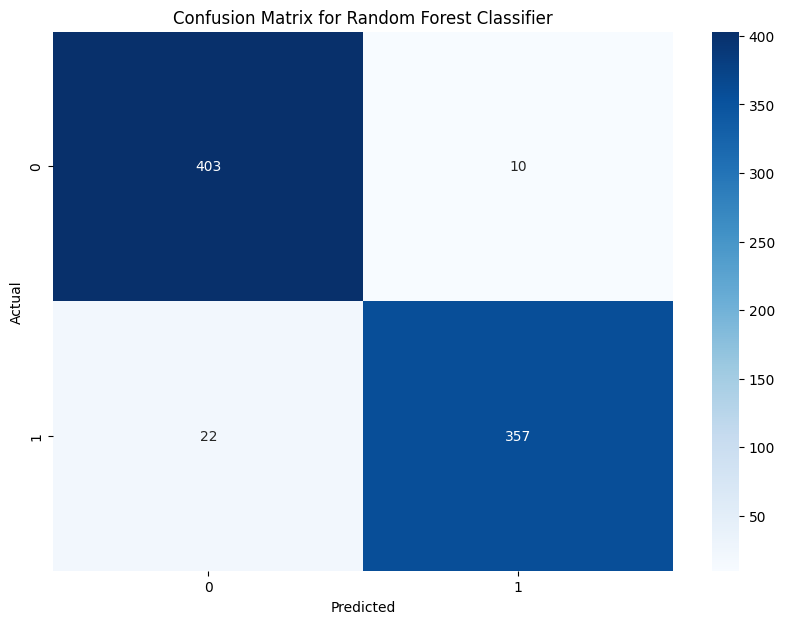

In [211]:
cm = confusion_matrix(RFC_test_target, RFC_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Support Vector Machine ( accuracy : 0.91 roc_auc_score= 0.95)

In [40]:
SVM_train_feature = train_feature
SVM_train_target = train_target
SVM_test_feature = test_feature
SVM_test_target = test_target


In [258]:
from sklearn import svm
svm_model = svm.SVC(probability=True)
svm_model.fit(SVM_train_feature,SVM_train_target)

SVC(probability=True)

In [259]:
SVM_test_feature_predict = svm_model.predict(SVM_test_feature)
SVM_test_feature_predict_proba = svm_model.predict_proba(SVM_test_feature)[:,1]

In [260]:
from sklearn.metrics import classification_report
print(classification_report(SVM_test_target, SVM_test_feature_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       413
           1       0.90      0.91      0.90       379

    accuracy                           0.91       792
   macro avg       0.91      0.91      0.91       792
weighted avg       0.91      0.91      0.91       792



In [283]:
print(f1_score(SVM_test_target, SVM_test_feature_predict))
print(accuracy_score(SVM_test_target, SVM_test_feature_predict))

0.9026315789473685
0.9065656565656566


In [261]:
roc_auc_score(SVM_test_target, SVM_test_feature_predict_proba)

0.9529857468679525

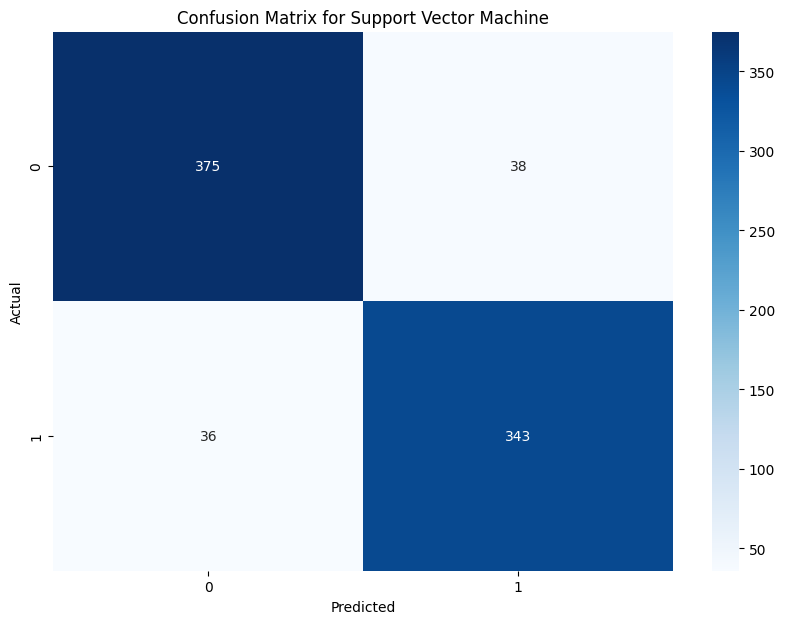

In [44]:
cm = confusion_matrix(SVM_test_target, SVM_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 하이퍼파라미터 튜닝

### RandomForestClassfier ( accuracy : 0.96, roc_auc_score : 0.97 )

In [120]:
RFC_grid_train_feature = train_feature
RFC_grid_train_target = train_target
RFC_grid_test_feature = test_feature
RFC_grid_test_target = test_target

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
hyper_parameters = {'n_estimators': range(100,500), 'max_depth': range(3,10), 'min_samples_split':range(2,10)}
RFC_estimator_model=RandomForestClassifier()

# score 방식 지정
scoring =  make_scorer(roc_auc_score)


RFC_grid_model = GridSearchCV(RFC_estimator_model,hyper_parameters, scoring = scoring) 


In [122]:
RFC_grid_model.fit(RFC_grid_train_feature,RFC_grid_train_target)
RFC_best_model = RFC_grid_model.best_estimator_

In [123]:
RFC_best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 148,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
RFC_grid_test_feature_predict = RFC_best_model.predict(RFC_grid_test_feature)
RFC_grid_test_feature_predict_proba = RFC_best_model.predict_proba(RFC_grid_test_feature)[:,1]

In [125]:
from sklearn.metrics import classification_report
print(classification_report(RFC_grid_test_target, RFC_grid_test_feature_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       413
           1       0.98      0.94      0.96       379

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [284]:
print(f1_score(RFC_grid_test_target, RFC_grid_test_feature_predict))
print(accuracy_score(RFC_grid_test_target, RFC_grid_test_feature_predict))

0.955585464333782
0.9583333333333334


In [126]:
roc_auc_score(RFC_grid_test_target, RFC_grid_test_feature_predict_proba)

0.9718834450286532

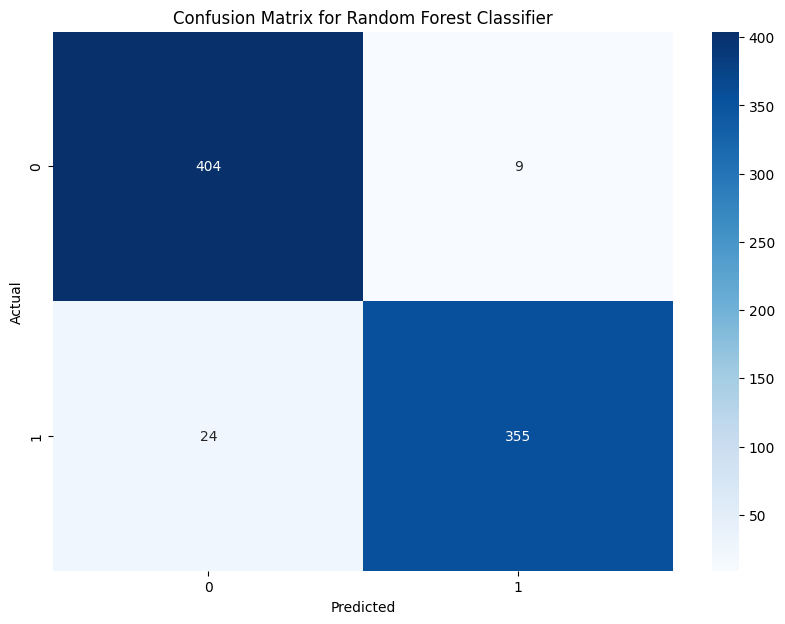

In [127]:
cm = confusion_matrix(RFC_grid_test_target, RFC_grid_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### K-Nearst Neighbor ( accuracy : 0.93, roc_auc_score : 0.97 )

In [89]:
KNN_grid_train_feature = train_feature
KNN_grid_train_target = train_target
KNN_grid_test_feature = test_feature
KNN_grid_test_target = test_target


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
# n_estimators : 177
hyper_parameters = {'n_neighbors': range(1,15),'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'p': [1, 2]}
KNN_estimator_model = KNeighborsClassifier()

# score 방식 지정
scoring =  make_scorer(roc_auc_score)


KNN_grid_model = GridSearchCV(KNN_estimator_model,hyper_parameters, scoring = scoring) 


In [114]:
KNN_grid_model.fit(KNN_grid_train_feature,KNN_grid_train_target)
KNN_best_model = KNN_grid_model.best_estimator_

In [115]:
KNN_best_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 1,
 'weights': 'distance'}

In [116]:
KNN_grid_test_feature_predict = KNN_best_model.predict(KNN_grid_test_feature)
KNN_grid_test_feature_predict_proba = KNN_best_model.predict_proba(KNN_grid_test_feature)[:,1]

In [117]:
from sklearn.metrics import classification_report
print(classification_report(KNN_grid_test_target, KNN_grid_test_feature_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       413
           1       0.91      0.94      0.93       379

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



In [285]:
print(f1_score(KNN_grid_test_target, KNN_grid_test_feature_predict))
print(accuracy_score(KNN_grid_test_target, KNN_grid_test_feature_predict))

0.9272727272727272
0.9292929292929293


In [118]:
roc_auc_score(KNN_grid_test_target, KNN_grid_test_feature_predict_proba)

0.96896701527532

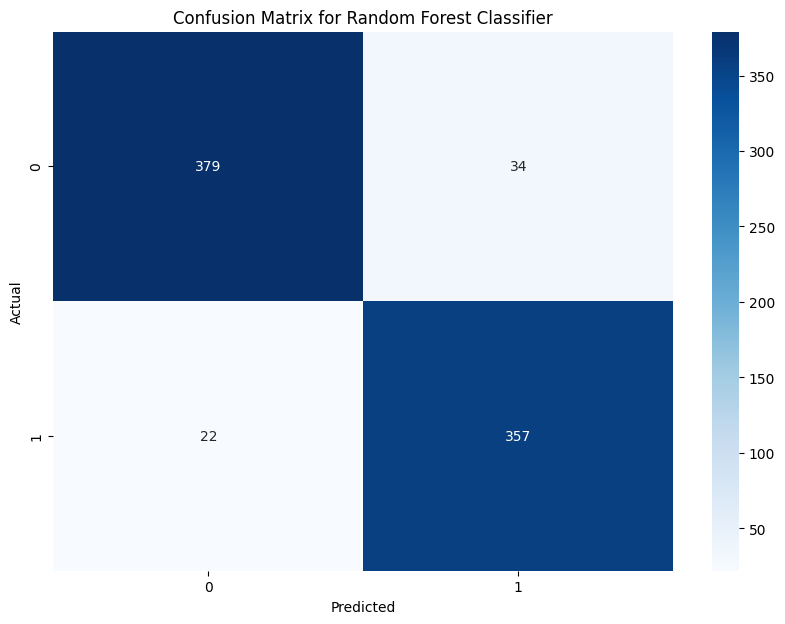

In [119]:
cm = confusion_matrix(KNN_grid_test_target, KNN_grid_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 스태킹 알고리즘과 부스팅 알고리즘 비교

### 앙상블 모델 ( accuracy : 0.96, roc_auc_score : 0.97)

In [49]:
stacking_train_feature = train_feature
stacking_train_target = train_target
stacking_test_feature = test_feature
stacking_test_target = test_target


In [130]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
stackingclassifier = StackingClassifier(
    estimators=[('rf', RFC_best_model), ('knn', KNN_best_model)],
    final_estimator=RFC_best_model)

stackingclassifier.fit(stacking_train_feature,stacking_train_target)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=9,
                                                       min_samples_split=4,
                                                       n_estimators=148)),
                               ('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=8, p=1,
                                                     weights='distance'))],
                   final_estimator=RandomForestClassifier(max_depth=9,
                                                          min_samples_split=4,
                                                          n_estimators=148))

In [131]:
stacking_test_feature_predict = stackingclassifier.predict(stacking_test_feature)
stacking_test_feature_predict_proba = stackingclassifier.predict_proba(stacking_test_feature)[:,1]

In [132]:
from sklearn.metrics import classification_report
print(classification_report(stacking_test_target, stacking_test_feature_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       413
           1       0.97      0.93      0.95       379

    accuracy                           0.96       792
   macro avg       0.96      0.95      0.96       792
weighted avg       0.96      0.96      0.96       792



In [286]:
print(f1_score(stacking_test_target, stacking_test_feature_predict))
print(accuracy_score(stacking_test_target, stacking_test_feature_predict))

0.9528936742934051
0.9558080808080808


In [133]:
roc_auc_score(stacking_test_target, stacking_test_feature_predict_proba)

0.9658685083084707

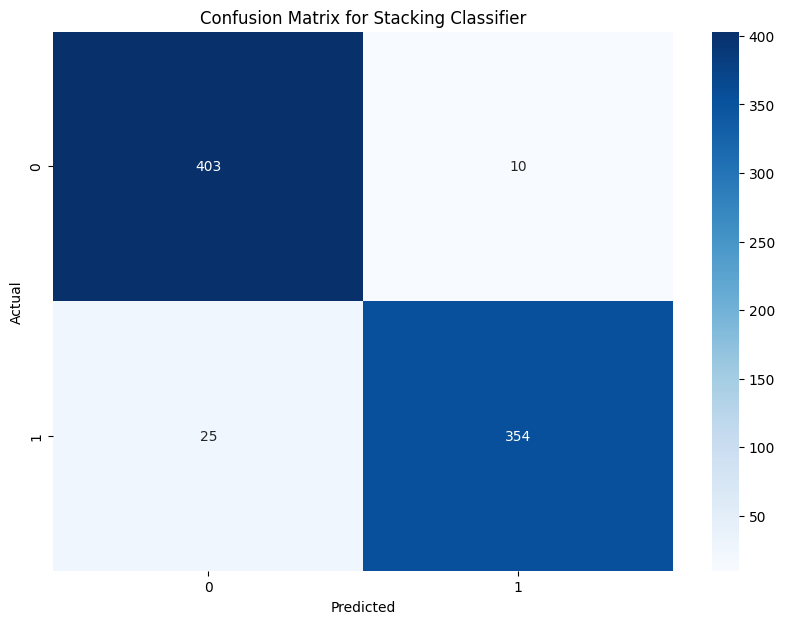

In [134]:
cm = confusion_matrix(stacking_test_target, stacking_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 부스팅 모델 ( accuracy : 0.96, roc_auc_score : 0.97)

In [150]:
adaboost_train_feature = train_feature
adaboost_train_target = train_target
adaboost_test_feature = test_feature
adaboost_test_target = test_target


In [246]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
adaboostclassifier = AdaBoostClassifier(RFC_best_model)
adaboostclassifier.fit(adaboost_train_feature,adaboost_train_target)

/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=9,
                                                    min_samples_split=4,
                                                    n_estimators=148))

In [247]:
adaboost_test_feature_predict = adaboostclassifier.predict(adaboost_test_feature)
adaboost_test_feature_predict_proba = adaboostclassifier.predict_proba(adaboost_test_feature)[:,1]

In [248]:
from sklearn.metrics import classification_report
print(classification_report(adaboost_test_target, adaboost_test_feature_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       413
           1       0.98      0.94      0.96       379

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [267]:
print(f1_score(adaboost_test_target, adaboost_test_feature_predict))

0.9568733153638814


In [249]:
roc_auc_score(adaboost_test_target, adaboost_test_feature_predict_proba)

0.9740683715908438

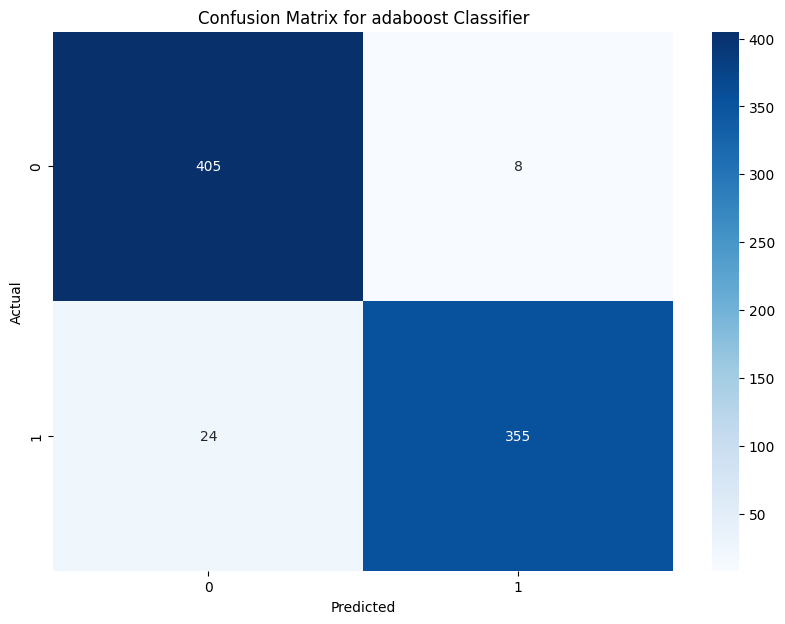

In [250]:
cm = confusion_matrix(adaboost_test_target, adaboost_test_feature_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for adaboost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 모델 비교

## 정확성 비교

In [251]:
dict_accuracy = {}
dict_accuracy['randomForestClassifier'] = accuracy_score(RFC_test_target, RFC_test_feature_predict)
dict_accuracy['knn'] = accuracy_score(knn_test_target, knn_test_feature_predict)

dict_accuracy['RFC_best_model'] = accuracy_score(RFC_grid_test_target, RFC_grid_test_feature_predict)
dict_accuracy['KNN_best_model'] = accuracy_score(KNN_grid_test_target, KNN_grid_test_feature_predict)

dict_accuracy['adaboostclassifier'] = accuracy_score(stacking_test_target, stacking_test_feature_predict)
dict_accuracy['stackingclassifier'] = accuracy_score(adaboost_test_target, adaboost_test_feature_predict)
sorted(dict_accuracy.items(),reverse= True, key=lambda item: item[1])

[('randomForestClassifier', 0.9595959595959596),
 ('stackingclassifier', 0.9595959595959596),
 ('RFC_best_model', 0.9583333333333334),
 ('adaboostclassifier', 0.9558080808080808),
 ('KNN_best_model', 0.9292929292929293),
 ('knn', 0.9217171717171717)]

## F1-score 비교

In [252]:
dict_f1 = {}
dict_f1['randomForestClassifier'] = f1_score(RFC_test_target, RFC_test_feature_predict)
dict_f1['knn'] = f1_score(knn_test_target, knn_test_feature_predict)

dict_f1['RFC_best_model'] = f1_score(RFC_grid_test_target, RFC_grid_test_feature_predict)
dict_f1['KNN_best_model'] = f1_score(KNN_grid_test_target, KNN_grid_test_feature_predict)

dict_f1['adaboostclassifier'] = f1_score(stacking_test_target, stacking_test_feature_predict)
dict_f1['stackingclassifier'] = f1_score(adaboost_test_target, adaboost_test_feature_predict)
sorted(dict_f1.items(),reverse= True, key=lambda item: item[1])

[('randomForestClassifier', 0.9571045576407506),
 ('stackingclassifier', 0.9568733153638814),
 ('RFC_best_model', 0.955585464333782),
 ('adaboostclassifier', 0.9528936742934051),
 ('KNN_best_model', 0.9272727272727272),
 ('knn', 0.9194805194805195)]

## ROC AUC 비교

In [253]:
dict_roc = {}
dict_roc['randomForestClassifier'] = roc_auc_score(RFC_test_target, RFC_test_feature_predict_proba)
dict_roc['knn'] = roc_auc_score(knn_test_target, knn_test_feature_predict_proba)

dict_roc['RFC_best_model'] = roc_auc_score(RFC_grid_test_target, RFC_grid_test_feature_predict_proba)
dict_roc['KNN_best_model'] = roc_auc_score(KNN_grid_test_target, KNN_grid_test_feature_predict_proba)

dict_roc['adaboostclassifier'] = roc_auc_score(stacking_test_target, stacking_test_feature_predict_proba)
dict_roc['stackingclassifier'] = roc_auc_score(adaboost_test_target, adaboost_test_feature_predict_proba)
sorted(dict_roc.items(),reverse= True, key=lambda item: item[1])

[('randomForestClassifier', 0.9744644693886678),
 ('stackingclassifier', 0.9740683715908438),
 ('RFC_best_model', 0.9718834450286532),
 ('KNN_best_model', 0.96896701527532),
 ('adaboostclassifier', 0.9658685083084707),
 ('knn', 0.9643639755441553)]

## 실행 시간 비교

In [254]:
import time
def execution_time(model):
    start_time = time.time()
    test_target_predict = model.predict(test_feature)
    end_time = time.time()
    
    execution_time = end_time - start_time
    return execution_time

In [255]:
dict_time = {}
dict_time['knn'] = execution_time(knn)
dict_time['randomForestClassifier'] = execution_time(randomForestClassifier)

dict_time['RFC_best_model'] = execution_time(RFC_best_model)
dict_time['KNN_best_model'] = execution_time(KNN_best_model)

dict_time['adaboostclassifier'] = execution_time(adaboostclassifier)
dict_time['stackingclassifier'] = execution_time(stackingclassifier)
sorted(dict_time.items(), key=lambda item: item[1])

[('KNN_best_model', 0.009749650955200195),
 ('randomForestClassifier', 0.014699220657348633),
 ('RFC_best_model', 0.01943230628967285),
 ('stackingclassifier', 0.04155468940734863),
 ('knn', 0.04425549507141113),
 ('adaboostclassifier', 0.0687096118927002)]

# 결론 
- 모델 성능을 정확성, f1-score, roc-auc, 실행 시간을 비교해본 결과, 전반적으로 RandomForestClassifier가 가장 우수한 성능을 보임.
- 인지 및 기능 평가 그룹을 활용하여 RandomForestClassifier로 알츠하이머 유무를 0.97의 정확도로 예측할 수 있음.
- 다만 인지 및 기능 평가의 경우 전문가의 도움이 필요함.
- 사람들이 꼭 병원을 가지 않아도 알츠하이머의 유/무를 확인할 수 있도록 알츠하이머 유/무를 예측할 수 있는 모델을 제작할 계획
  